# 🚗 Car Price Prediction using PyCaret

This notebook uses PyCaret to build and evaluate a regression model to predict car prices based on various features such as brand, model, engine size, year, etc.

In [1]:
# Install PyCaret if not already installed
!pip install pycaret

In [2]:
import pandas as pd
from pycaret.regression import *

# Load dataset
df = pd.read_csv('car_price_dataset.csv')

# Initialize PyCaret setup
setup(data=df, target='Price', session_id=123, remove_multicollinearity=True, multicollinearity_threshold=0.9)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(10000, 10)"
4,Transformed data shape,"(10000, 24)"
5,Transformed train set shape,"(7000, 24)"
6,Transformed test set shape,"(3000, 24)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


In [3]:
# Compare and select best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,21.3145,7506.6287,81.6253,0.9992,0.0718,0.0055,0.5840
lasso,Lasso Regression,22.9311,7509.2404,81.7053,0.9992,0.0708,0.0057,0.5710
ridge,Ridge Regression,21.5401,7506.8349,81.6407,0.9992,0.0717,0.0056,0.5140
llar,Lasso Least Angle Regression,22.9316,7509.2714,81.7056,0.9992,0.0708,0.0057,0.0400
br,Bayesian Ridge,21.3208,7506.6335,81.6258,0.9992,0.0718,0.0055,0.0400
lightgbm,Light Gradient Boosting Machine,147.3710,35271.2826,187.7490,0.9964,0.0321,0.0204,0.4130
gbr,Gradient Boosting Regressor,176.4835,50321.3385,224.2063,0.9948,0.0415,0.0253,0.2250
et,Extra Trees Regressor,182.8170,61821.8681,248.4387,0.9936,0.0378,0.0247,0.5460
rf,Random Forest Regressor,289.9042,139018.4743,372.6497,0.9857,0.0527,0.0381,0.6200
dt,Decision Tree Regressor,520.7859,455582.8787,674.5744,0.9530,0.0934,0.0672,0.0510


In [4]:
# Tune the best model
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.0552,9033.3790,95.0441,0.9990,0.1213,0.0050
1,18.7860,1903.6701,43.6311,0.9998,0.0236,0.0040
2,19.2598,1536.5812,39.1993,0.9998,0.0204,0.0039
3,22.0110,12256.8064,110.7105,0.9987,0.0691,0.0062
4,24.6947,15809.3833,125.7354,0.9984,0.1206,0.0076
5,25.8808,14040.7361,118.4936,0.9986,0.1355,0.0082
6,19.2859,6012.8429,77.5425,0.9993,0.0822,0.0044
7,21.9583,6857.4733,82.8099,0.9993,0.0716,0.0058
8,20.3279,3255.9085,57.0606,0.9997,0.0326,0.0048


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [5]:
# Evaluate the model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

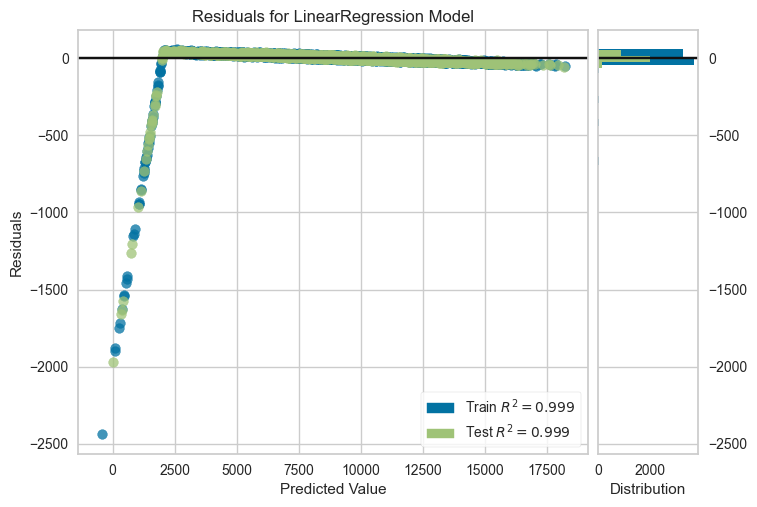

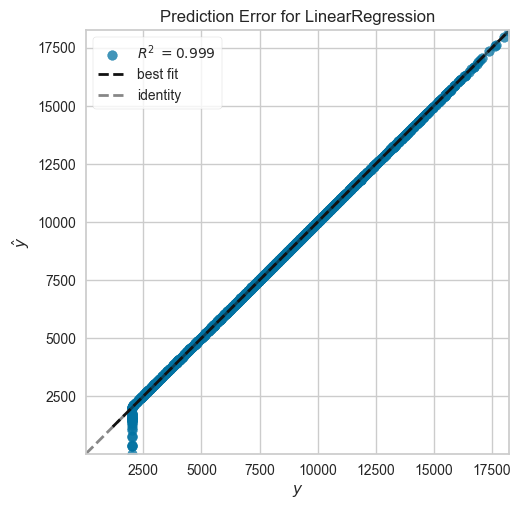

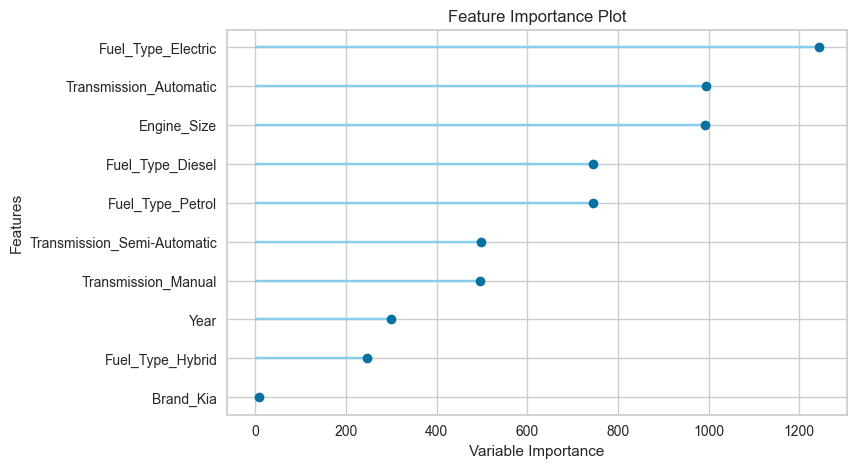

In [6]:
# Show performance plots
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='feature')

In [7]:
# Finalize and predict
final_model = finalize_model(tuned_model)
predictions = predict_model(final_model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,21.0930,7099.0854,84.2561,0.9993,0.0991,0.0056


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,prediction_label
2656,Audi,Q5,2014,2.5,Petrol,Automatic,110792,3,4,10084,10083.969796
445,Honda,CR-V,2012,4.9,Electric,Manual,4608,3,2,14507,14485.688686
9505,BMW,5 Series,2005,2.4,Electric,Automatic,208232,2,3,7335,7348.517992
332,Kia,Sportage,2002,4.4,Petrol,Semi-Automatic,169424,3,3,5711,5736.315388
4168,Chevrolet,Equinox,2009,3.0,Petrol,Semi-Automatic,237887,5,2,5042,5066.425316


In [8]:
# Show hyperparameters
print(tuned_model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
